# <font color="gren">**Trabalho final Sinais e Sistemas**

## <font color="green"> **Alunos:**
* Pedro Gasparelo Leme - 14602421
* Vitor Alexandre Garcia Vaz - 14611432

## <font color="green">**Solução: Plotagem da convolução de sinais**

## **Imports necessários**

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.interpolate import interp1d


## **Funções necessárias**

### Integral de uma função pelo método de Simpson

In [26]:
def intg_s(a,b,N,f):
    h=(b-a)/N ##calcula tamanho das partições
    som=0 ##somatório da fórmula

    x=np.zeros(N+1)
    x[0]=a

    for k in range(1,N+1):
        x[k]=a+h*k ## valores de x a cada partição h
    
    for k in range (1,N+1):##cálculo do somatório
        xb=(x[k-1]+x[k])/2
        som=som+f(x[k-1])+4*f(xb)+f(x[k]) 

    return ((h/6)*som)

## **Convolução em si**
### utilizando método de Simpson para integração

### $conv(a,b,N,f,g,x) = f(x)*g(x) = \int_a^b f(t)g(x - t) \,dt$
* OBS: com partições de tamanho (b-a)/N

In [27]:
def conv(a,b,N,f,g,x):
    
    ##calcula tamanho das partições
    h=(b-a)/N 
    
    ##somatório da fórmula
    som=0 

    t=np.zeros(N+1)
    t[0]=a

    ## valores de t a cada partição h
    for k in range(1,N+1):
        t[k]=a+h*k 
    
    ##cálculo do somatório
    for k in range (1,N+1):
        tb=(t[k-1]+t[k])/2
        som += f(t[k-1])*g(x-t[k-1]) + 4*f(tb)*g(x-tb)+ f(t[k])*g(x-t[k]) 

    return ((h/6)*som)

## **Plotagem**

### **1 - Convolução de dois sinais Gate $G_5(t)$**

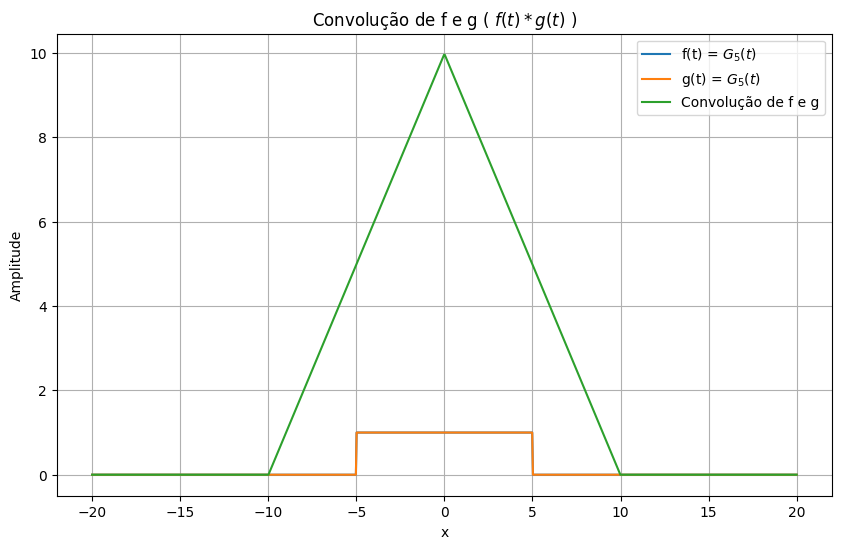

In [29]:
# Definindo as funções f e g
def f(t):
    if(abs(t) < 5):
        return 1
    return 0

def g(t):
    if(abs(t) < 5):
        return 1
    return 0

# Parâmetros
a = -20
b = 20
N = 1000
x_values = np.linspace(a, b, N)

# Calculando a convolução para cada valor de x
conv_values = [conv(a, b, N, f, f, x) for x in x_values]

# Plotando os resultados
plt.figure(figsize=(10, 6))
plt.plot(x_values, [f(x) for x in x_values], label='f(t) = $G_5(t)$')
plt.plot(x_values, [g(x) for x in x_values], label='g(t) = $G_5(t)$')
plt.plot(x_values, conv_values, label='Convolução de f e g')
plt.xlabel('x')
plt.ylabel('Amplitude')
plt.title('Convolução de f e g ( $f(t)*g(t)$ )')
plt.legend()
plt.grid(True)
plt.show()

